# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [173]:
import pandas as pd
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels

Booking_ID  no_of_adults  ...  no_of_special_requests  booking_status
0       INN00001           NaN  ...                     NaN    Not_Canceled
1       INN00002           2.0  ...                     1.0    Not_Canceled
2       INN00003           1.0  ...                     0.0        Canceled
3       INN00004           2.0  ...                     0.0        Canceled
4       INN00005           2.0  ...                     0.0        Canceled
...          ...           ...  ...                     ...             ...
36270   INN36271           3.0  ...                     1.0    Not_Canceled
36271   INN36272           2.0  ...                     2.0        Canceled
36272   INN36273           2.0  ...                     2.0    Not_Canceled
36273   INN36274           2.0  ...                     0.0        Canceled
36274   INN36275           2.0  ...                     0.0    Not_Canceled

[36275 rows x 19 columns]

## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## Judging Criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## Time is ticking. Good luck! 

In [174]:
df = hotels.copy()
df

Booking_ID  no_of_adults  ...  no_of_special_requests  booking_status
0       INN00001           NaN  ...                     NaN    Not_Canceled
1       INN00002           2.0  ...                     1.0    Not_Canceled
2       INN00003           1.0  ...                     0.0        Canceled
3       INN00004           2.0  ...                     0.0        Canceled
4       INN00005           2.0  ...                     0.0        Canceled
...          ...           ...  ...                     ...             ...
36270   INN36271           3.0  ...                     1.0    Not_Canceled
36271   INN36272           2.0  ...                     2.0        Canceled
36272   INN36273           2.0  ...                     2.0    Not_Canceled
36273   INN36274           2.0  ...                     0.0        Canceled
36274   INN36275           2.0  ...                     0.0    Not_Canceled

[36275 rows x 19 columns]

# Checking the data
- Checking the data types of each columns
- Looking if there's a lot of null values in the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [7]:
df.isna().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [12]:
df.shape

(36275, 19)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Analyzing and understanding the data
- We're going to understand the data first using pandas and plot.

In [13]:
df.describe()

no_of_adults  no_of_children  ...  avg_price_per_room  no_of_special_requests
count  35862.000000    35951.000000  ...        35815.000000            35486.000000
mean       1.845017        0.105366  ...          103.418207                0.619343
std        0.518652        0.402871  ...           35.057342                0.785849
min        0.000000        0.000000  ...            0.000000                0.000000
25%        2.000000        0.000000  ...           80.300000                0.000000
50%        2.000000        0.000000  ...           99.450000                0.000000
75%        2.000000        0.000000  ...          120.000000                1.000000
max        4.000000       10.000000  ...          540.000000                5.000000

[8 rows x 14 columns]

# Type of meal plan
- Understanding the category meal plan

In [14]:
df.groupby(["type_of_meal_plan"]).mean()

no_of_adults  ...  no_of_special_requests
type_of_meal_plan                ...                        
Meal Plan 1            1.836641  ...                0.630325
Meal Plan 2            1.874807  ...                0.388751
Meal Plan 3            2.000000  ...                0.600000
Not Selected           1.872144  ...                0.707572

[4 rows x 14 columns]

In [15]:
df.groupby(["type_of_meal_plan"]).sum()

no_of_adults  ...  no_of_special_requests
type_of_meal_plan                ...                        
Meal Plan 1             49795.0  ...                 17032.0
Meal Plan 2              6065.0  ...                  1251.0
Meal Plan 3                10.0  ...                     3.0
Not Selected             9342.0  ...                  3523.0

[4 rows x 14 columns]

In [17]:
df.groupby(["type_of_meal_plan"])[["no_of_adults"]].count()

no_of_adults
type_of_meal_plan              
Meal Plan 1               27112
Meal Plan 2                3235
Meal Plan 3                   5
Not Selected               4990

In [34]:
df.groupby(["type_of_meal_plan"]).agg({"no_of_weekend_nights": ["min", "max", "mean"], "no_of_week_nights": ["min", "max", "mean"], "avg_price_per_room": ["max", "mean", "std"],"lead_time": ["min", "max", "mean"]})

no_of_weekend_nights       ... lead_time            
                                   min  max  ...       max        mean
type_of_meal_plan                            ...                      
Meal Plan 1                        0.0  7.0  ...     443.0   82.576611
Meal Plan 2                        0.0  5.0  ...     418.0  147.856522
Meal Plan 3                        0.0  1.0  ...      34.0    8.800000
Not Selected                       0.0  6.0  ...     346.0   59.447965

[4 rows x 12 columns]

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
sns.barplot(data = df, x = "type_of_meal_plan", y = "avg_price_per_room", ax = axes[0], hue = "booking_status")
sns.barplot(data = df, x = "type_of_meal_plan", y = "lead_time", ax = axes[1], hue = "booking_status")
plt.suptitle("Avg Price Per Room and Avg Lead Time based on the type of meal plan")

Text(0.5, 0.98, 'Avg Price Per Room and Avg Lead Time based on the type of meal plan')

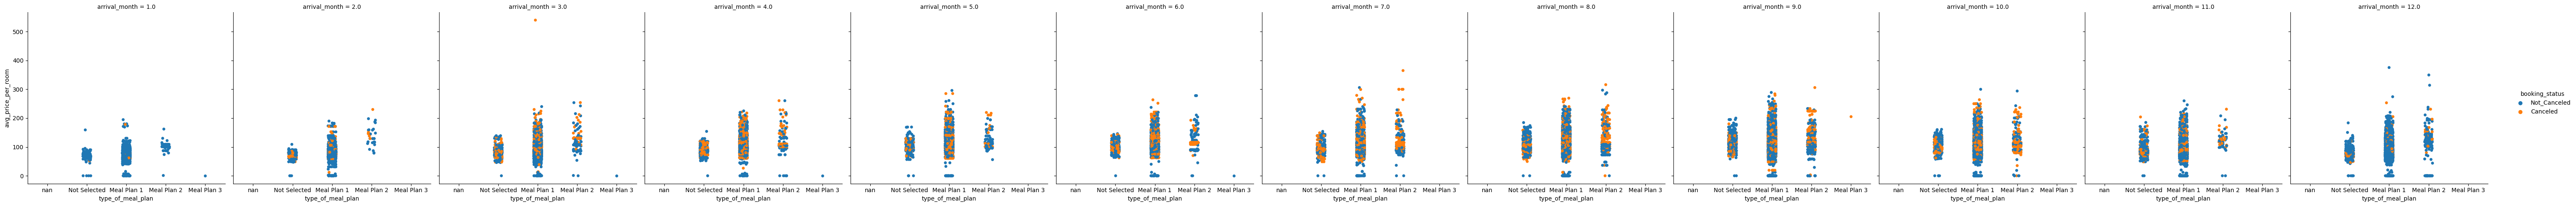

In [29]:
sns.catplot(data = df, x = "type_of_meal_plan", y = "avg_price_per_room", hue = "booking_status", col = "arrival_month")

<Figure size 1500x2000 with 0 Axes>

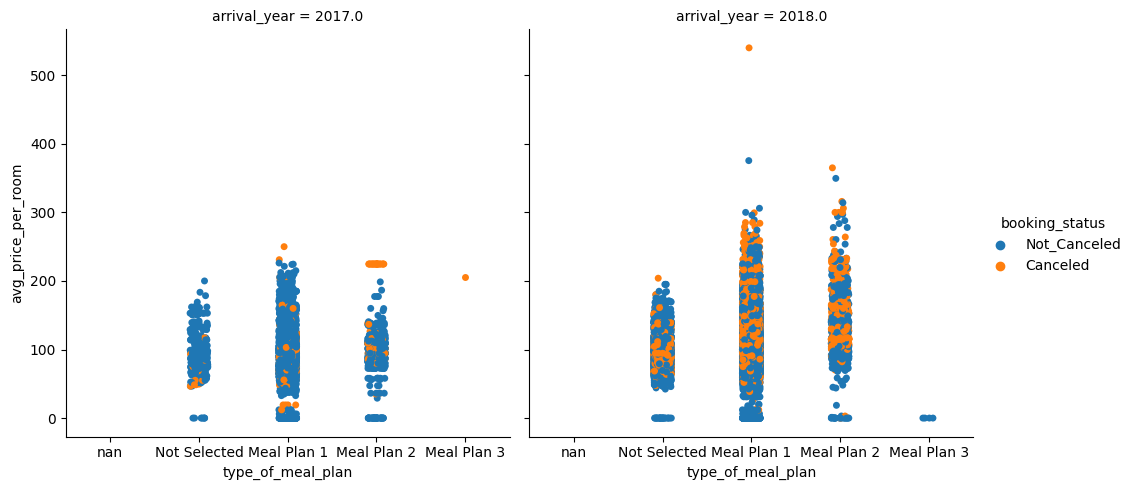

In [31]:
plt.figure(figsize = (15, 20))
plt.suptitle("Avg Price Per Room based on the type of meal that varies in the arrival year")
sns.catplot(data = df, x = "type_of_meal_plan", y = "avg_price_per_room", hue = "booking_status", col = "arrival_year")

Text(0.5, 1.0, 'Booking Status Canceled')

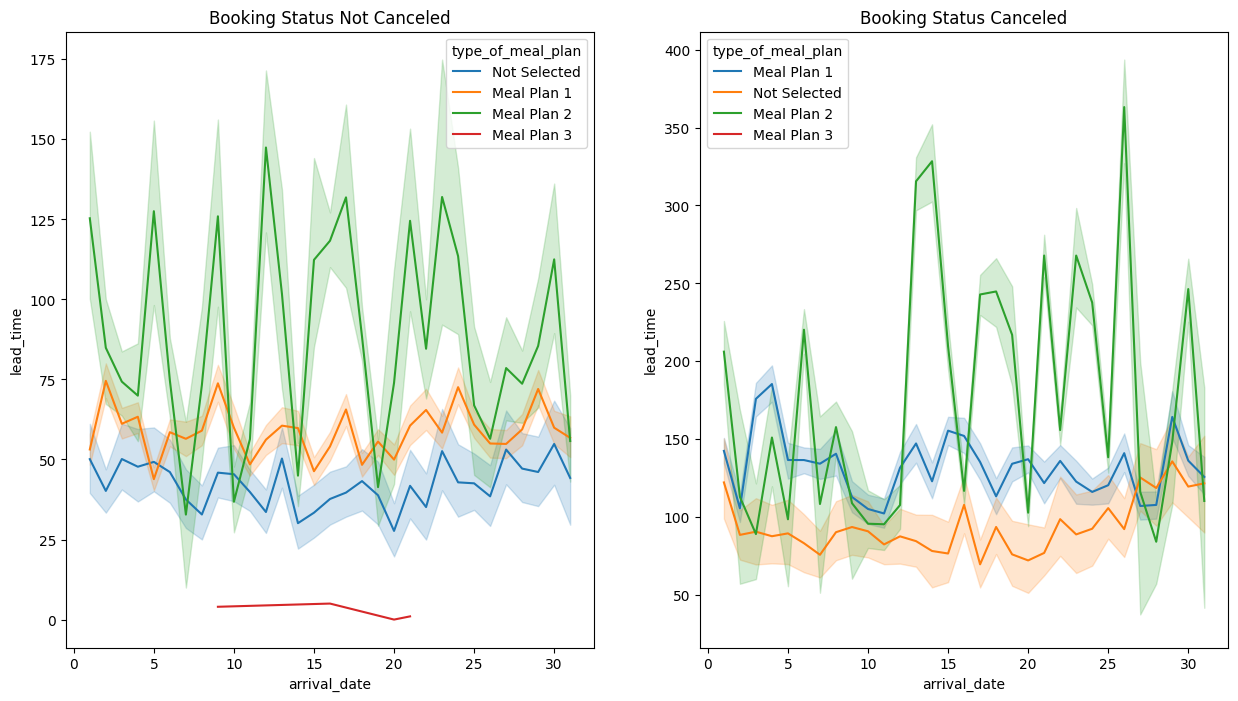

In [47]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
sns.lineplot(data = df[df["booking_status"] == "Not_Canceled"], x = "arrival_date", y = "lead_time", hue = "type_of_meal_plan", ax = axes[0])
axes[0].set_title("Booking Status Not Canceled")
sns.lineplot(data = df[df["booking_status"] == "Canceled"], x = "arrival_date", y = "lead_time", hue = "type_of_meal_plan", ax = axes[1])
axes[1].set_title("Booking Status Canceled")

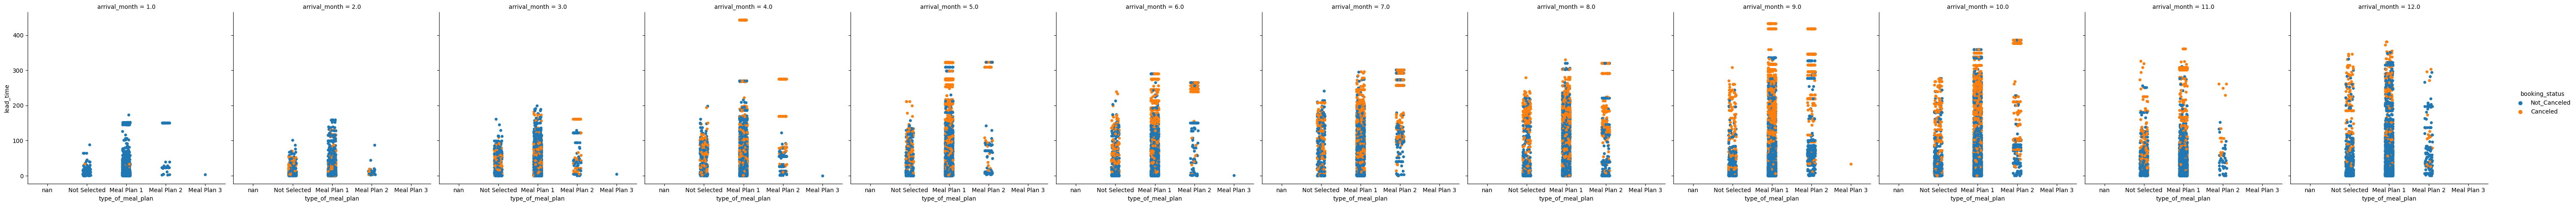

In [18]:
sns.catplot(data = df, x = "type_of_meal_plan", y = "lead_time", hue = "booking_status", col = "arrival_month")

In [19]:
sns.catplot(data = df, x = "type_of_meal_plan", y = "lead_time", hue = "booking_status", col = "arrival_year")

Text(0.5, 1.0, 'Year 2018')

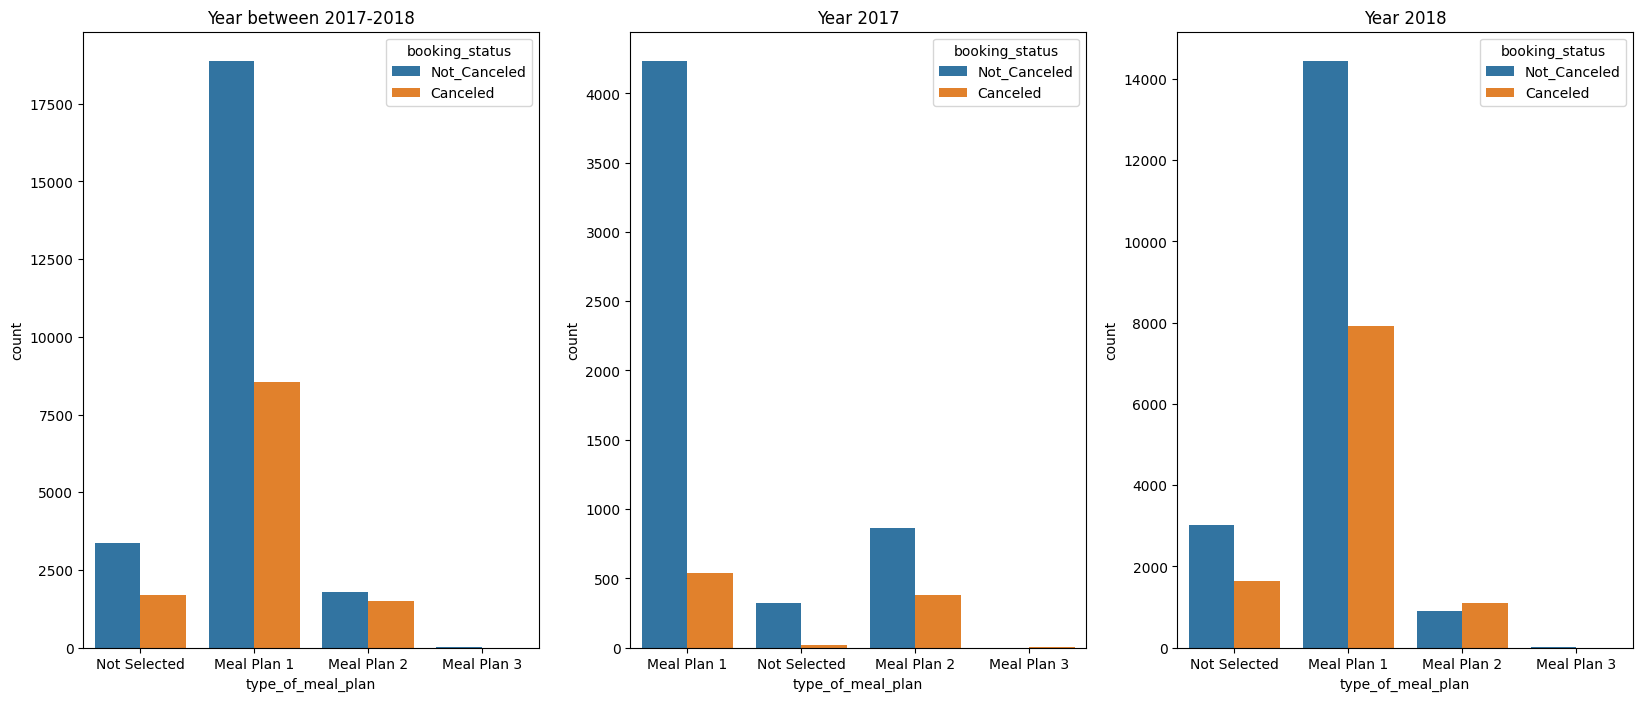

In [55]:
fig, axes = plt.subplots(1,3, figsize = (20, 8))
sns.countplot(data = df, x = "type_of_meal_plan", hue = "booking_status", ax=axes[0])
axes[0].set_title("Year between 2017-2018")
sns.countplot(data = df[df["arrival_year"] == 2017], x = "type_of_meal_plan", hue = "booking_status", ax=axes[1])
axes[1].set_title("Year 2017")
sns.countplot(data = df[df["arrival_year"] == 2018], x = "type_of_meal_plan", hue = "booking_status", ax=axes[2])
axes[2].set_title("Year 2018")

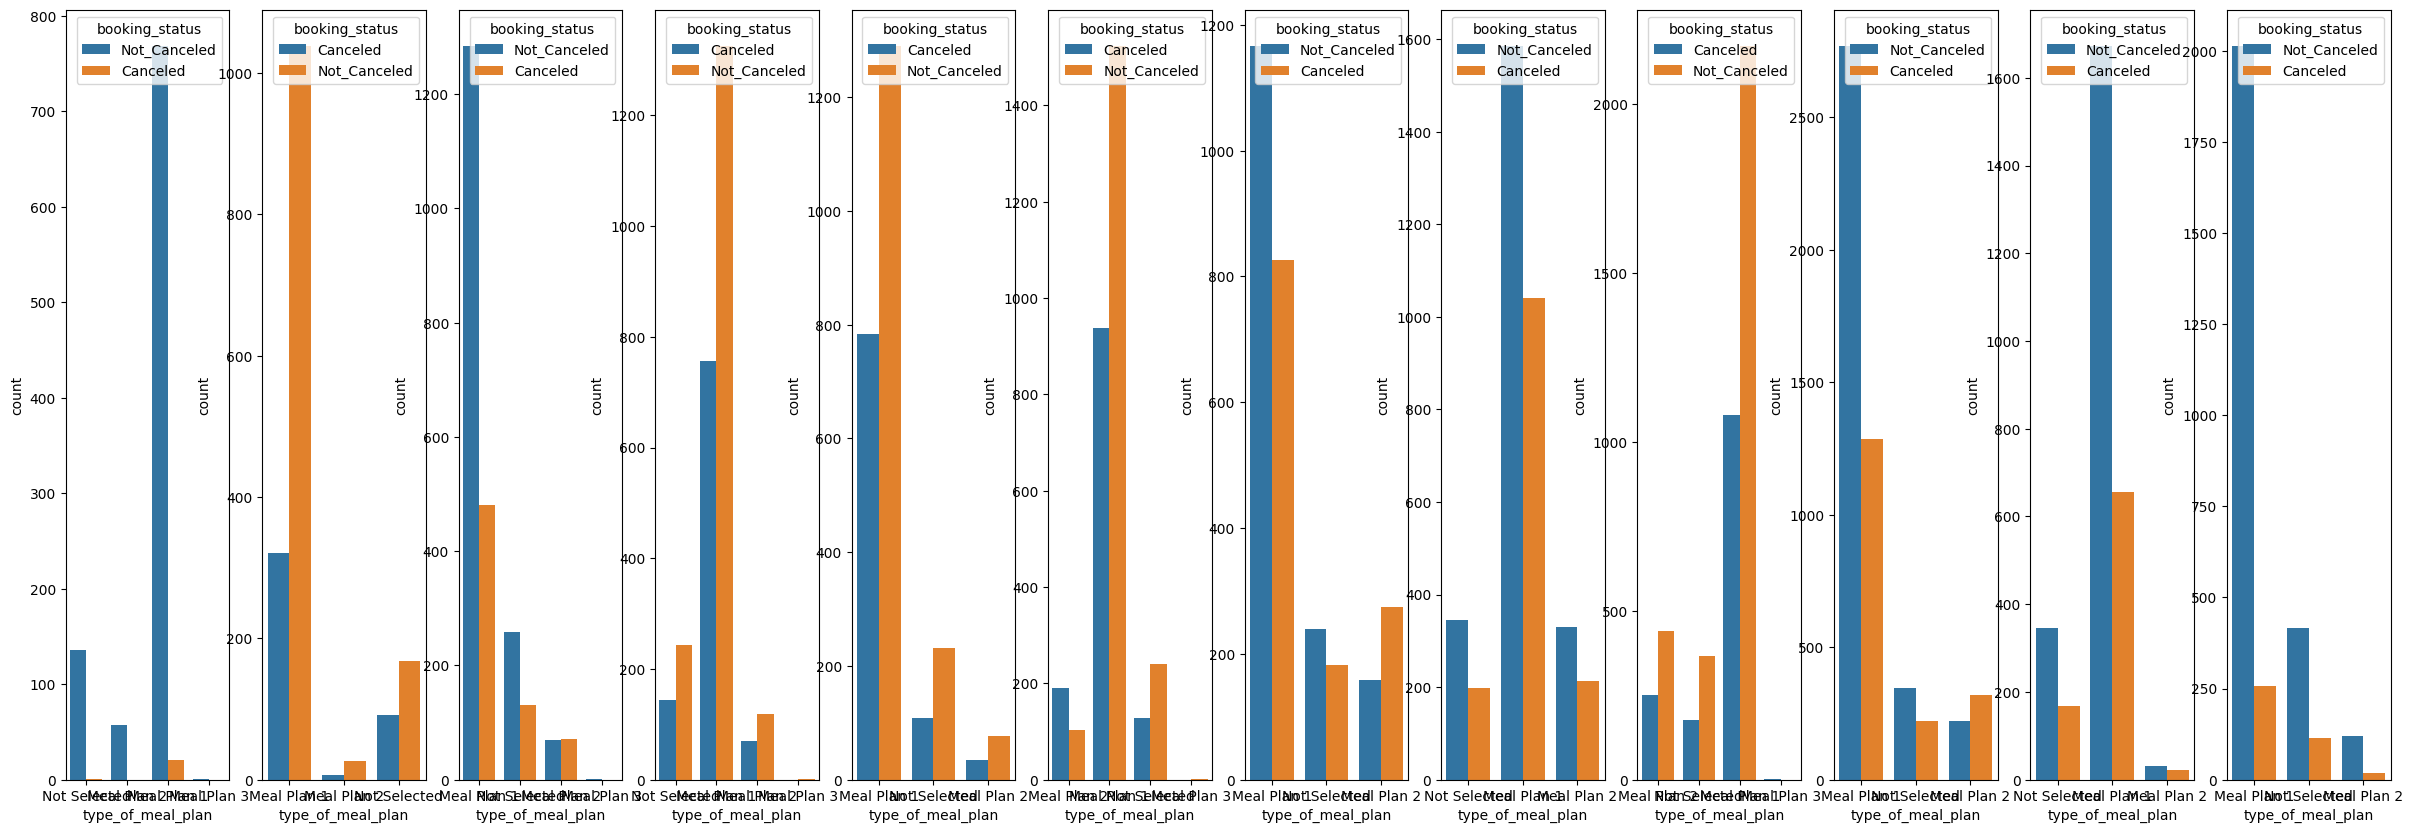

In [61]:
fig, axes = plt.subplots(1, 12, figsize = (30, 10))
for id, i in enumerate(range(1, 13)):
    sns.countplot(data = df[df["arrival_month"] == i], x = "type_of_meal_plan", hue = "booking_status", ax=axes[id])

<AxesSubplot: xlabel='type_of_meal_plan', ylabel='lead_time'>

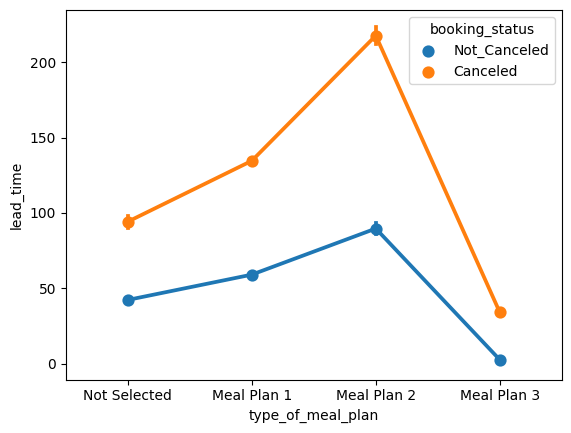

In [8]:
sns.pointplot(data = df, x="type_of_meal_plan", y = "lead_time", hue = "booking_status")

Text(0.5, 1.0, 'Number of booking per month')

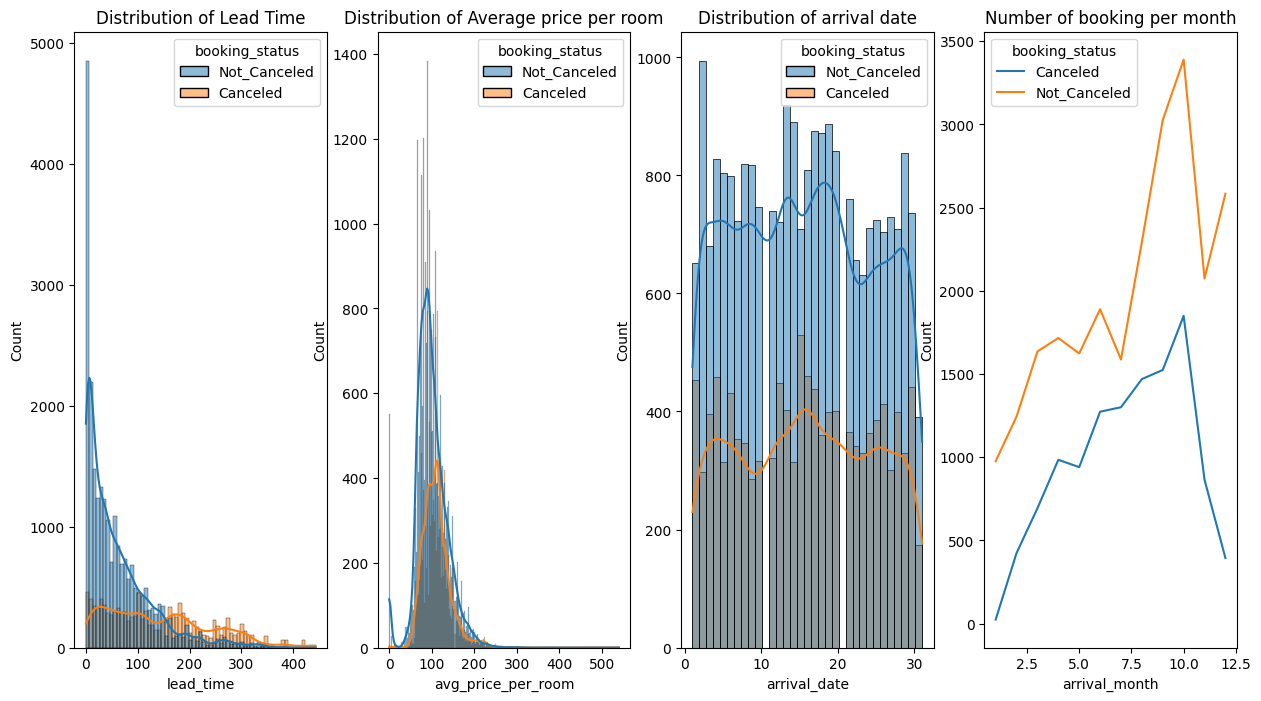

In [30]:
line1 = df.groupby(["booking_status", "arrival_month"]).count().reset_index()[["booking_status", "arrival_month", "Booking_ID"]]
line1.rename({"Booking_ID": "Count"}, axis = 1)
fig, axes = plt.subplots(1, 4, figsize = (15,8))
sns.histplot(data = df, x = "lead_time", hue="booking_status", kde = True, ax = axes[0])
axes[0].set_title("Distribution of Lead Time")
sns.histplot(data = df, x = "avg_price_per_room", hue="booking_status", kde = True, ax = axes[1])
axes[1].set_title("Distribution of Average price per room")
sns.histplot(data = df, x = "arrival_date", hue="booking_status", kde = True, ax = axes[2])
axes[2].set_title("Distribution of arrival date")
sns.lineplot(data = line1.rename({"Booking_ID": "Count"}, axis = 1), x = "arrival_month", y="Count", hue = "booking_status", ax = axes[3], color = ["orange", "red"])
axes[3].set_title("Number of booking per month")

# Room Type Reserved
- Understanding the Room Type Reserved Category

In [31]:
df.groupby(["room_type_reserved"]).mean()

no_of_adults  ...  no_of_special_requests
room_type_reserved                ...                        
Room_Type 1             1.770305  ...                0.556610
Room_Type 2             1.579425  ...                0.765528
Room_Type 3             1.500000  ...                0.166667
Room_Type 4             2.192561  ...                0.844483
Room_Type 5             1.744000  ...                0.344000
Room_Type 6             1.993541  ...                0.889617
Room_Type 7             2.230263  ...                1.218543

[7 rows x 14 columns]

In [32]:
df.groupby(["room_type_reserved"]).sum()

no_of_adults  ...  no_of_special_requests
room_type_reserved                ...                        
Room_Type 1              47669.0  ...                 14842.0
Room_Type 2               1044.0  ...                   493.0
Room_Type 3                  9.0  ...                     1.0
Room_Type 4              12673.0  ...                  4822.0
Room_Type 5                436.0  ...                    86.0
Room_Type 6               1852.0  ...                   814.0
Room_Type 7                339.0  ...                   184.0

[7 rows x 14 columns]

In [40]:
df.groupby(["room_type_reserved"]).min()

Booking_ID  ...  booking_status
room_type_reserved             ...                
Room_Type 1          INN00002  ...        Canceled
Room_Type 2          INN00033  ...        Canceled
Room_Type 3          INN01695  ...        Canceled
Room_Type 4          INN00008  ...        Canceled
Room_Type 5          INN00090  ...        Canceled
Room_Type 6          INN00061  ...        Canceled
Room_Type 7          INN00163  ...        Canceled

[7 rows x 16 columns]

In [41]:
df.groupby(["room_type_reserved"]).max()

Booking_ID  ...  booking_status
room_type_reserved             ...                
Room_Type 1          INN36275  ...    Not_Canceled
Room_Type 2          INN36267  ...    Not_Canceled
Room_Type 3          INN31171  ...    Not_Canceled
Room_Type 4          INN36265  ...    Not_Canceled
Room_Type 5          INN36182  ...    Not_Canceled
Room_Type 6          INN36270  ...    Not_Canceled
Room_Type 7          INN36081  ...    Not_Canceled

[7 rows x 16 columns]

In [42]:
df.groupby(["room_type_reserved"]).agg({"no_of_weekend_nights": ["min", "max", "mean"], "no_of_week_nights": ["min", "max", "mean"], "avg_price_per_room": ["max", "mean", "std"],"lead_time": ["min", "max", "mean"]})

no_of_weekend_nights       ... lead_time            
                                    min  max  ...       max        mean
room_type_reserved                            ...                      
Room_Type 1                         0.0  7.0  ...     443.0   89.656169
Room_Type 2                         0.0  3.0  ...     381.0  101.242009
Room_Type 3                         0.0  1.0  ...     180.0   74.600000
Room_Type 4                         0.0  6.0  ...     355.0   69.268217
Room_Type 5                         0.0  6.0  ...     297.0   58.956175
Room_Type 6                         0.0  5.0  ...     346.0   61.295455
Room_Type 7                         0.0  4.0  ...     213.0   36.653595

[7 rows x 12 columns]

<AxesSubplot: xlabel='room_type_reserved', ylabel='lead_time'>

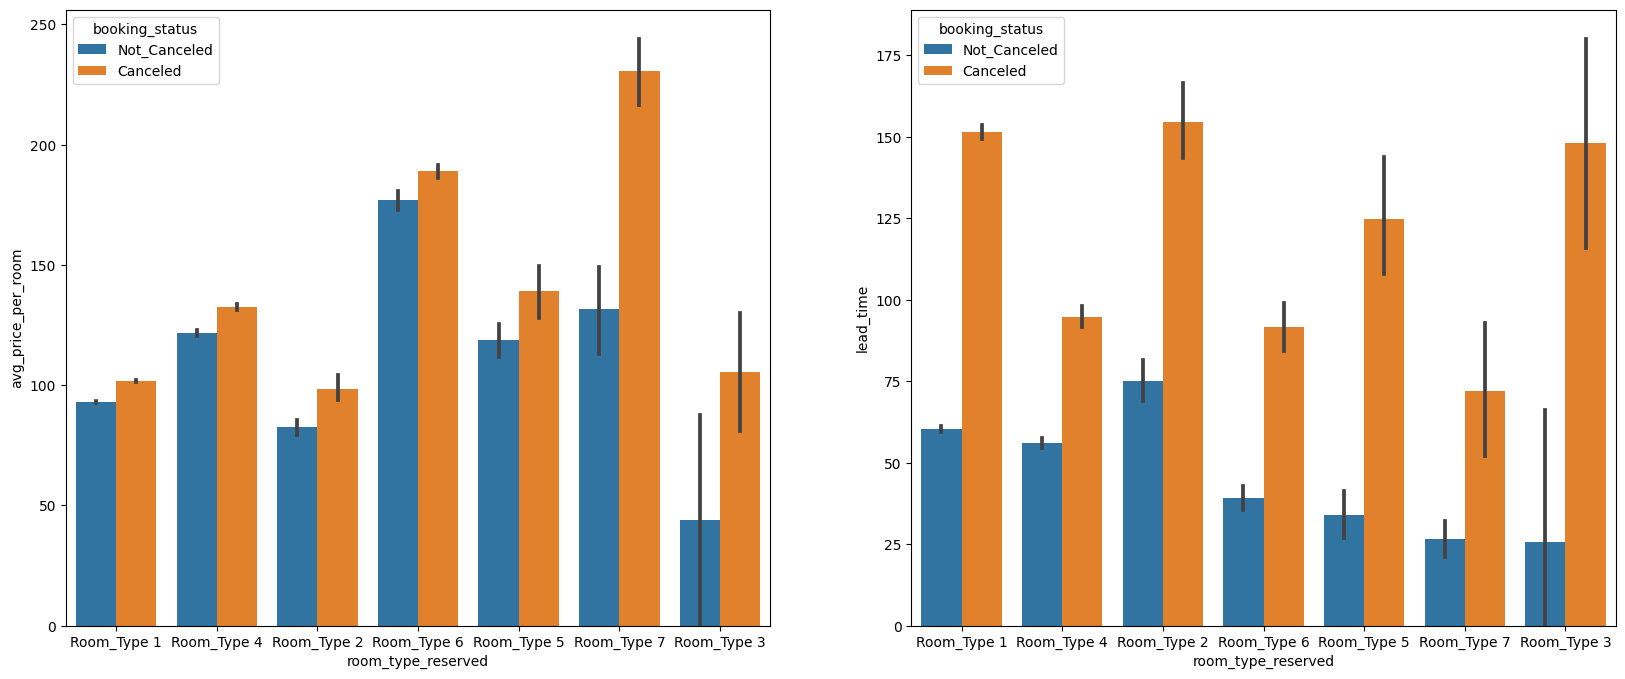

In [36]:
fig, axes = plt.subplots(1,2, figsize = (20, 8))
sns.barplot(data = df, x = "room_type_reserved", y = "avg_price_per_room", hue = "booking_status", ax = axes[0])
sns.barplot(data = df, x = "room_type_reserved", y = "lead_time", hue = "booking_status", ax = axes[1])

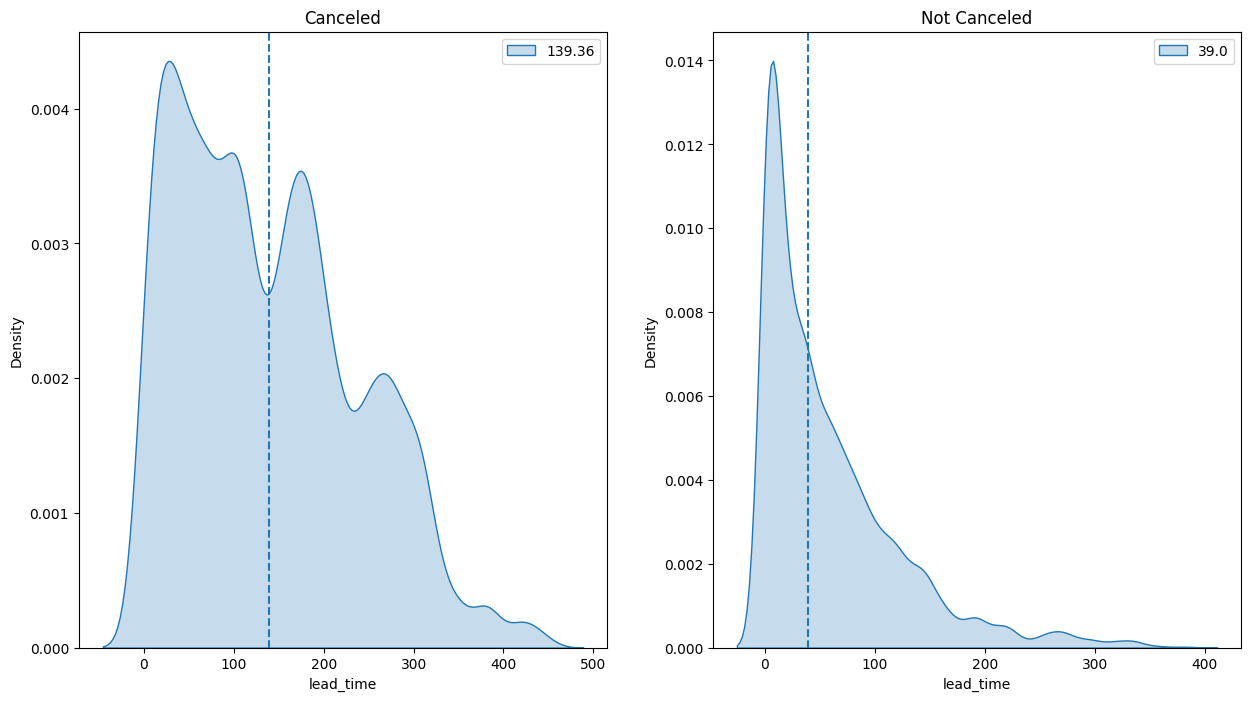

In [57]:
import numpy as np
canceled = df.loc[df["booking_status"] == "Canceled"]
not_canceled = df.loc[df["booking_status"] == "Not_Canceled"]
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.kdeplot(data = canceled, x = "lead_time", palette = "crest", fill = True, ax = axes[0], label = np.round(canceled["lead_time"].mean(), 2))
axes[0].set_title("Canceled")
axes[0].axvline(canceled["lead_time"].mean(), linestyle = "--")
axes[0].legend()
sns.kdeplot(data = not_canceled, x = "lead_time", palette = "crest", fill = True, ax = axes[1], label = np.round(not_canceled["lead_time"].median(), 2))
axes[1].set_title("Not Canceled")
axes[1].axvline(not_canceled["lead_time"].median(), linestyle = "--")
axes[1].legend()

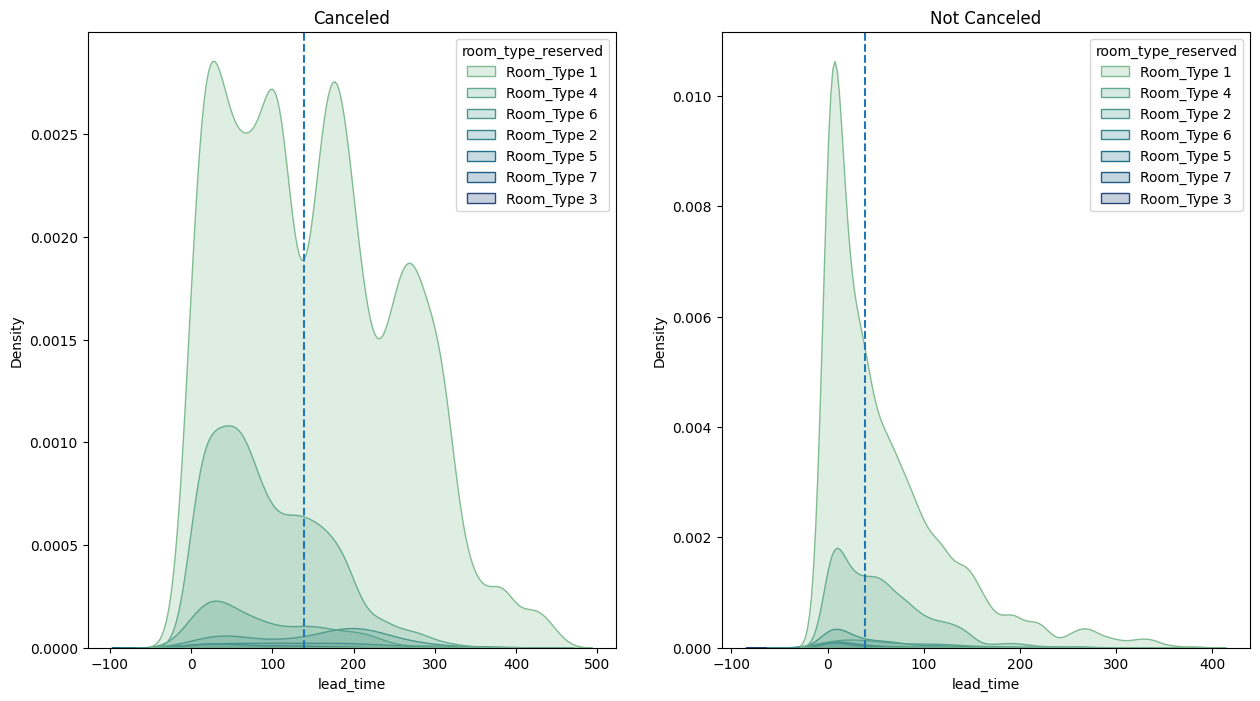

In [59]:
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.kdeplot(data = canceled, x = "lead_time", palette = "crest", fill = True, ax = axes[0], hue = "room_type_reserved")
axes[0].set_title("Canceled")
axes[0].axvline(canceled["lead_time"].mean(), linestyle = "--")

sns.kdeplot(data = not_canceled, x = "lead_time", palette = "crest", fill = True, ax = axes[1], hue = "room_type_reserved")
axes[1].set_title("Not Canceled")
axes[1].axvline(not_canceled["lead_time"].median(), linestyle = "--")


In [63]:
count1 = df["room_type_reserved"].value_counts().reset_index()
px.pie(count1, names="index", values = "room_type_reserved", hole = .3)


<AxesSubplot: xlabel='room_type_reserved', ylabel='count'>

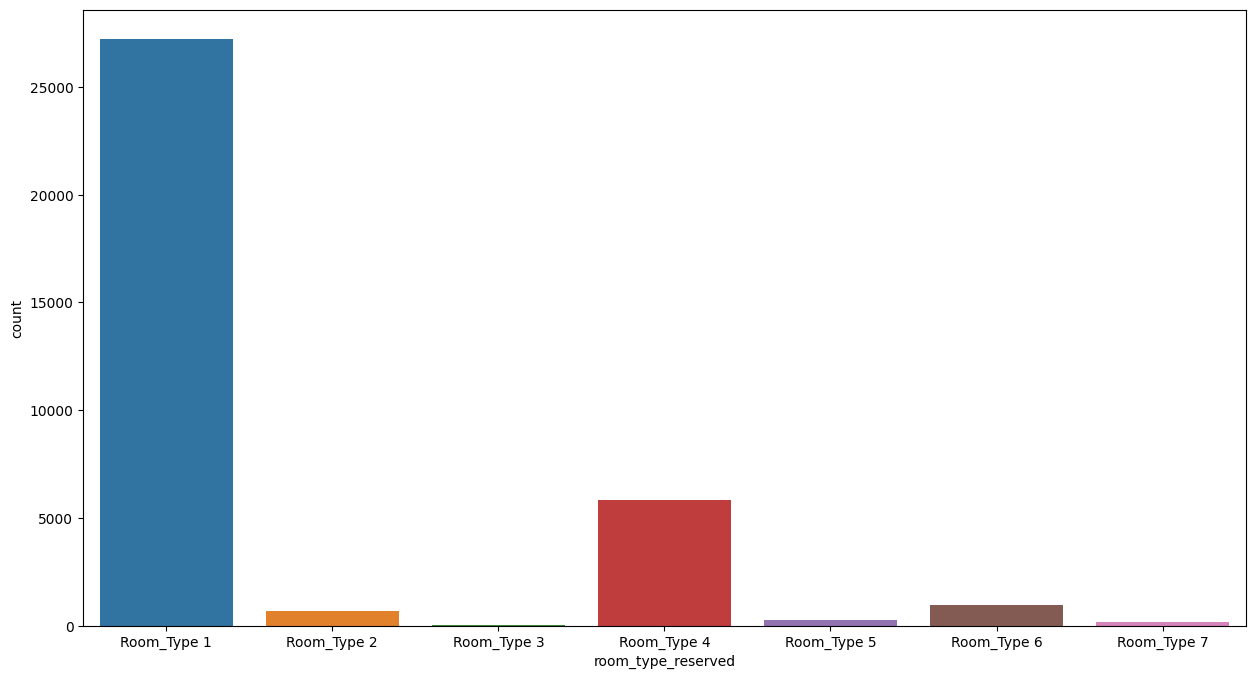

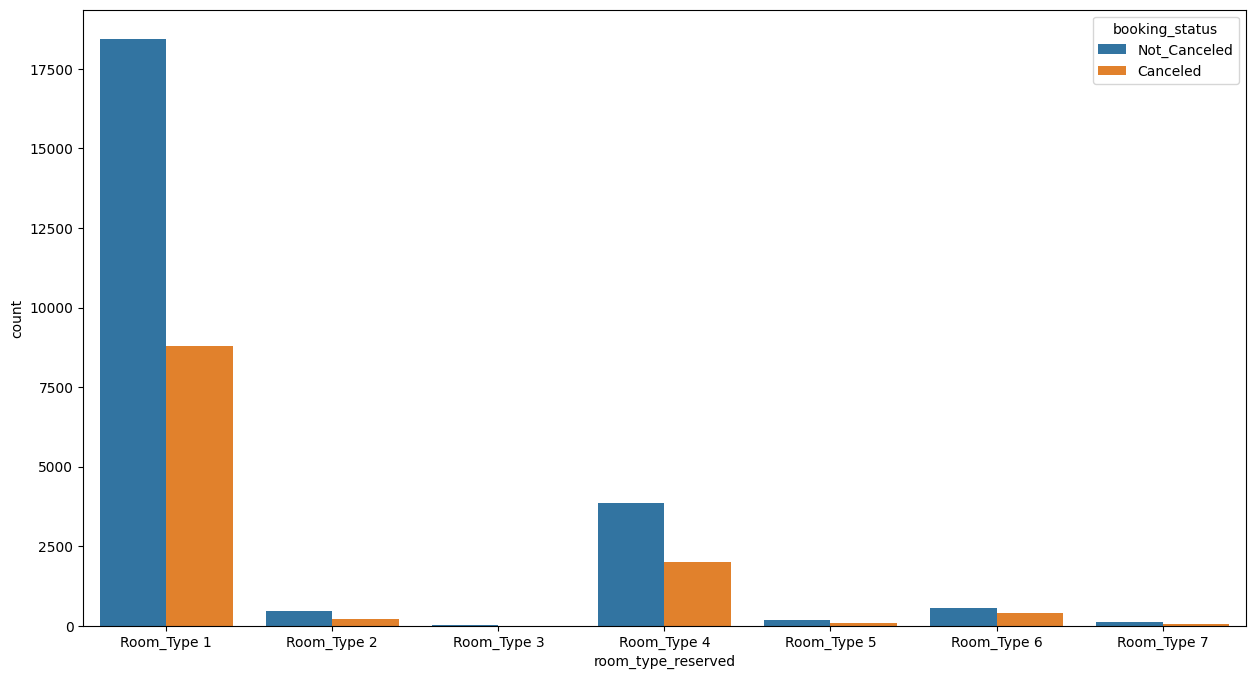

In [5]:
plt.figure(figsize=(15,8))
sns.countplot(data = df.sort_values("room_type_reserved"), x = "room_type_reserved")
plt.figure(figsize=(15,8))
sns.countplot(data = df.sort_values("room_type_reserved"), x = "room_type_reserved", hue = "booking_status")

<AxesSubplot: xlabel='room_type_reserved', ylabel='avg_price_per_room'>

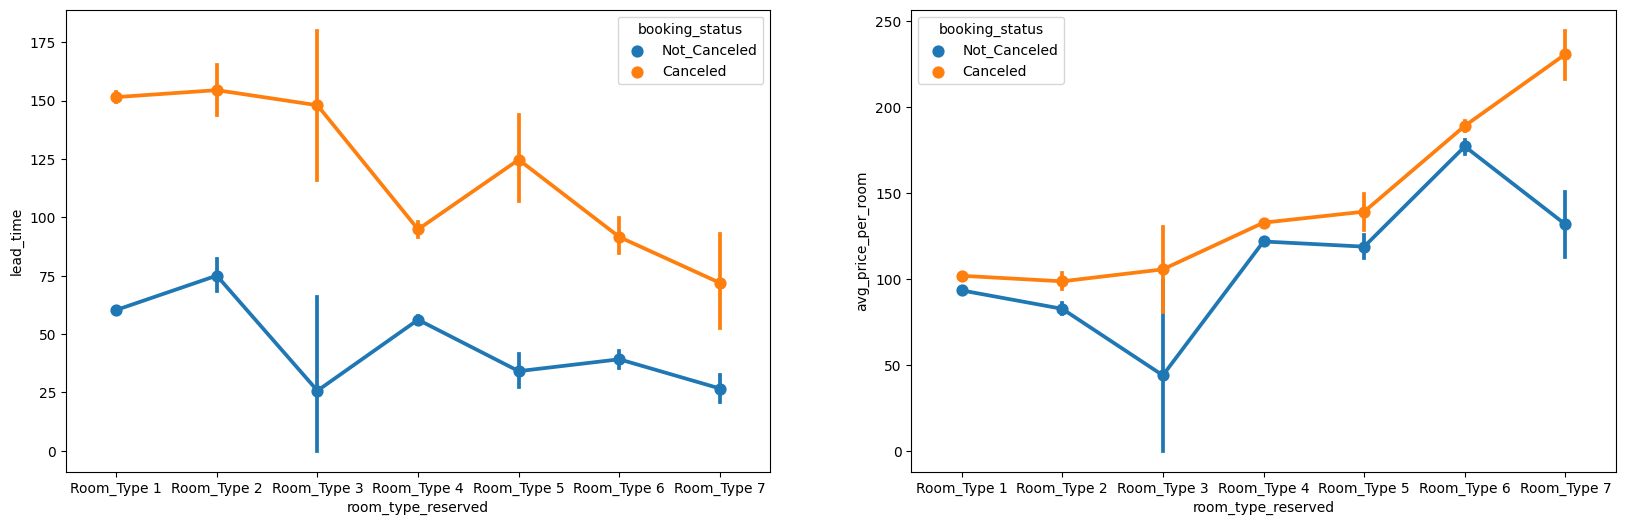

In [69]:
fig, axes = plt.subplots(1,2, figsize = (20, 6))
sns.pointplot(data = df.sort_values("room_type_reserved"), x = "room_type_reserved", y = "lead_time", ax = axes[0], hue = "booking_status")
sns.pointplot(data = df.sort_values("room_type_reserved"), x = "room_type_reserved", y = "avg_price_per_room", ax = axes[1], hue = "booking_status")

<AxesSubplot: xlabel='arrival_date', ylabel='lead_time'>

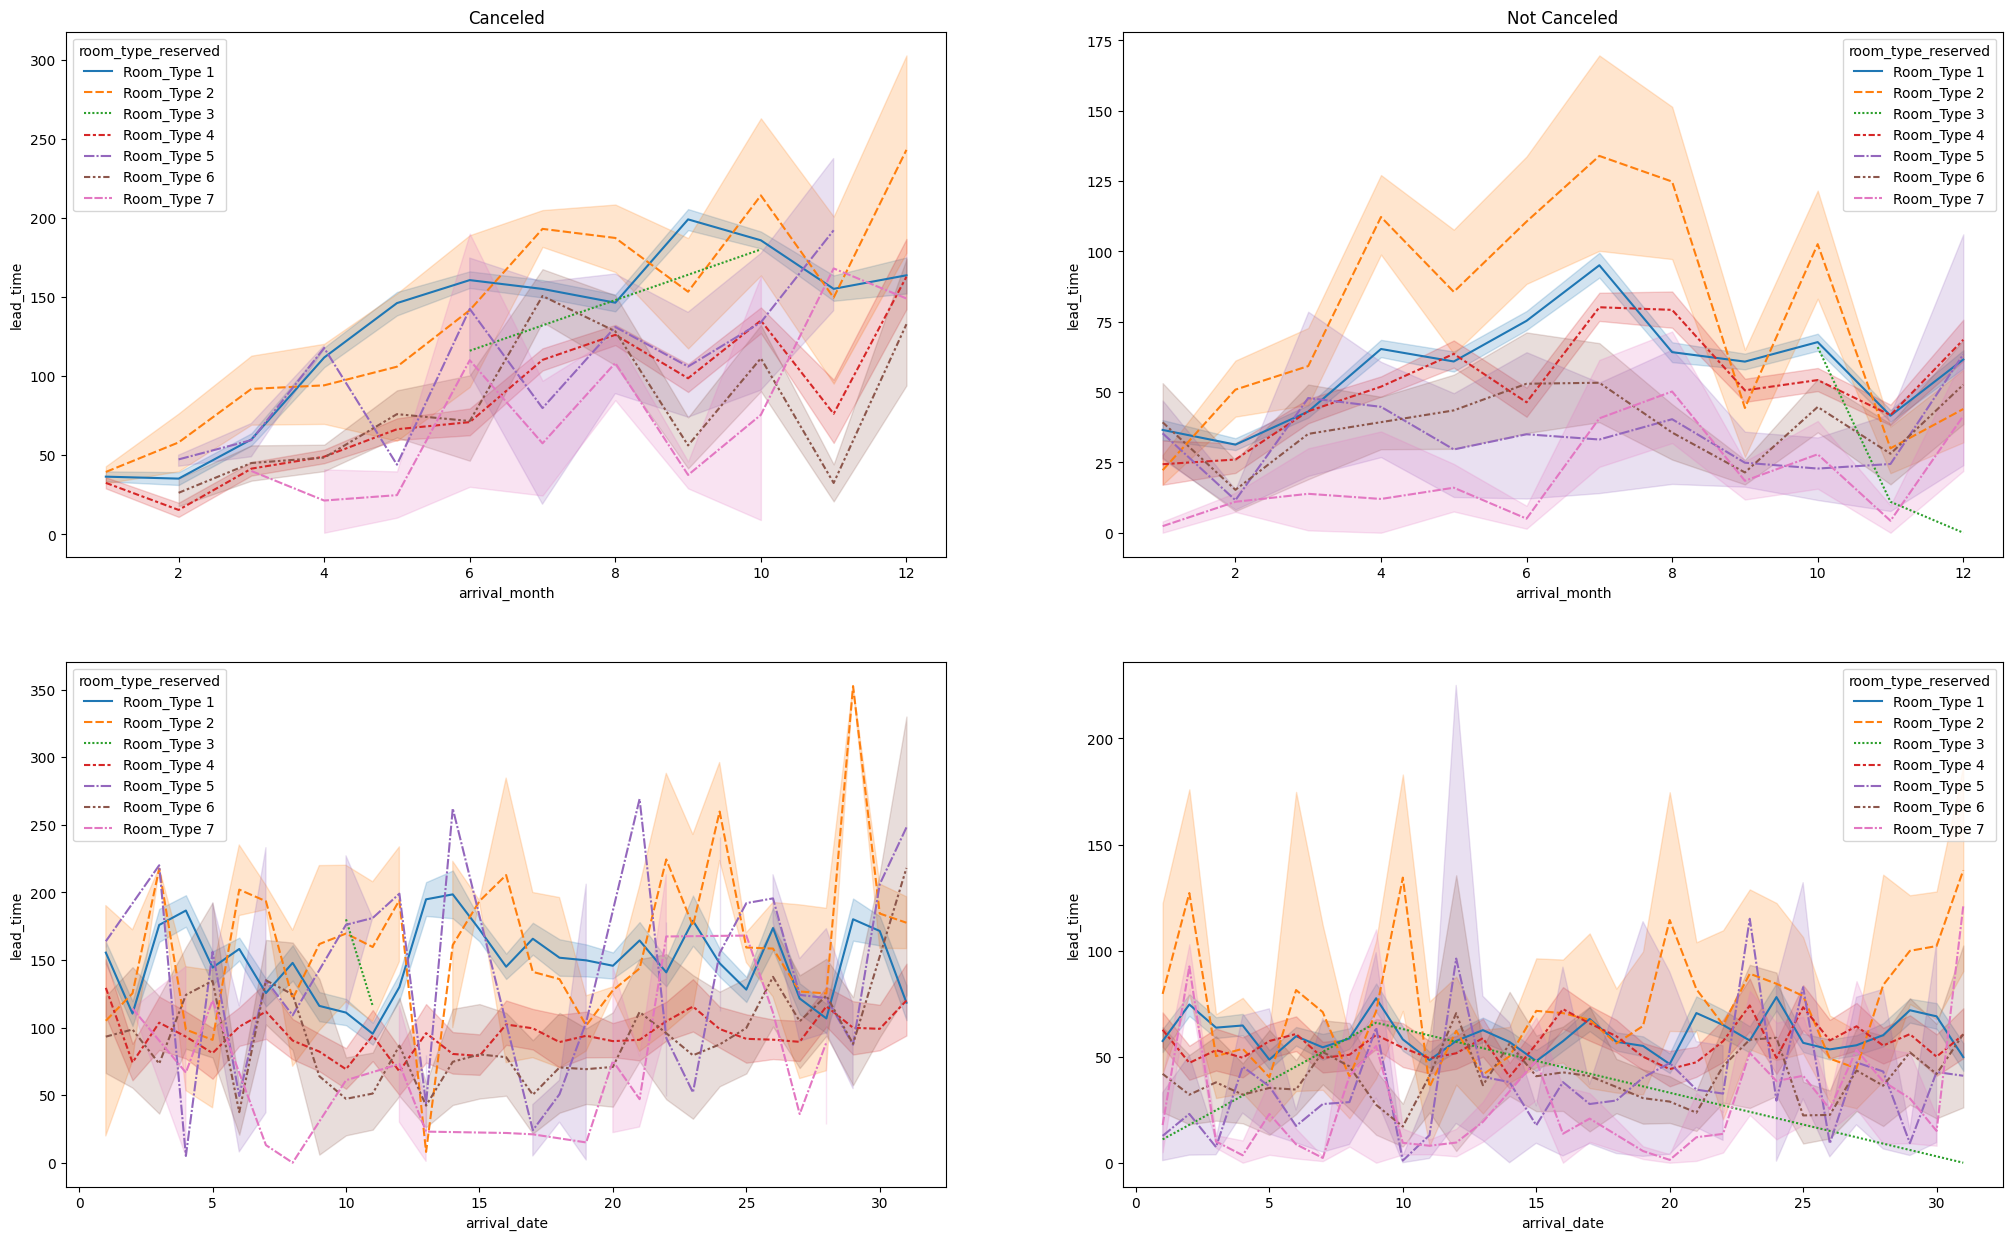

In [84]:
fig, axes = plt.subplots(2,2, figsize = (25, 15))
sns.lineplot(data = canceled.sort_values("room_type_reserved"), x = "arrival_month", y = "lead_time", hue = "room_type_reserved", ax = axes[0,0], style="room_type_reserved")
axes[0,0].set_title("Canceled")
sns.lineplot(data = not_canceled.sort_values("room_type_reserved"), x = "arrival_month", y = "lead_time", hue = "room_type_reserved", ax = axes[0,1], style = "room_type_reserved")
axes[0,1].set_title("Not Canceled")
sns.lineplot(data = canceled.sort_values("room_type_reserved"), x = "arrival_date", y = "lead_time", hue = "room_type_reserved", ax = axes[1,0], style="room_type_reserved")
sns.lineplot(data = not_canceled.sort_values("room_type_reserved"), x = "arrival_date", y = "lead_time", hue = "room_type_reserved", ax = axes[1,1], style = "room_type_reserved")


In [4]:
import numpy as np
canceled = df.loc[df["booking_status"] == "Canceled"]
not_canceled = df.loc[df["booking_status"] == "Not_Canceled"]

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2, figsize = (15, 8))
sns.barplot(data = canceled.sort_values("room_type_reserved"), x = "arrival_year", y = "lead_time", ax= axes[0], hue = "room_type_reserved")
axes[0].set_title("Canceled")
sns.barplot(data = not_canceled.sort_values("room_type_reserved"), x = "arrival_year", y = "lead_time", ax= axes[1], hue = "room_type_reserved")
axes[1].set_title("Not Canceled")

Text(0.5, 1.0, 'Not Canceled')

# Market Segment Type
- Understanding the Market Segment Type Category

In [16]:
df.groupby(["market_segment_type"]).mean()

no_of_adults  ...  no_of_special_requests
market_segment_type                ...                        
Aviation                 1.016807  ...                0.000000
Complementary            1.490566  ...                0.876011
Corporate                1.226750  ...                0.222164
Offline                  1.779013  ...                0.204170
Online                   1.939630  ...                0.841455

[5 rows x 14 columns]

In [17]:
df.groupby(["market_segment_type"]).sum()

no_of_adults  ...  no_of_special_requests
market_segment_type                ...                        
Aviation                    121.0  ...                     0.0
Complementary               553.0  ...                   325.0
Corporate                  2348.0  ...                   421.0
Offline                   17767.0  ...                  2017.0
Online                    42860.0  ...                 18321.0

[5 rows x 14 columns]

In [19]:
df.groupby(["market_segment_type"]).agg({"no_of_weekend_nights": ["min", "max", "mean"], "no_of_week_nights": ["min", "max", "mean"], "avg_price_per_room": ["max", "mean", "std"],"lead_time": ["min", "max", "mean"]})

no_of_weekend_nights       ... lead_time            
                                     min  max  ...       max        mean
market_segment_type                            ...                      
Aviation                             0.0  5.0  ...      23.0    5.545455
Complementary                        0.0  4.0  ...     386.0   11.884097
Corporate                            0.0  6.0  ...     297.0   21.572178
Offline                              0.0  5.0  ...     443.0  122.934392
Online                               0.0  6.0  ...     443.0   75.417649

[5 rows x 12 columns]

In [24]:
px.pie(df["market_segment_type"].value_counts().reset_index(), names = "index", values = "market_segment_type",  color_discrete_sequence=px.colors.sequential.RdBu, hole = .3, title="Market Segment Type Percentage")

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))
sns.countplot(data = canceled, x = "market_segment_type", ax = axes[0])
axes[0].set_title("People who cancelled based on Market Segment Type")
sns.countplot(data = not_canceled, x = "market_segment_type", ax = axes[1])
axes[1].set_title("People who did not cancelled based on Market Segment Type")

Text(0.5, 1.0, 'People who did not cancelled based on Market Segment Type')

In [48]:
plt.figure(figsize = (50, 30))
g = sns.FacetGrid(df, col = "market_segment_type", row = "booking_status")
g.map(sns.boxenplot, "lead_time")

<Figure size 5000x3000 with 0 Axes>

<Figure size 5000x3000 with 0 Axes>

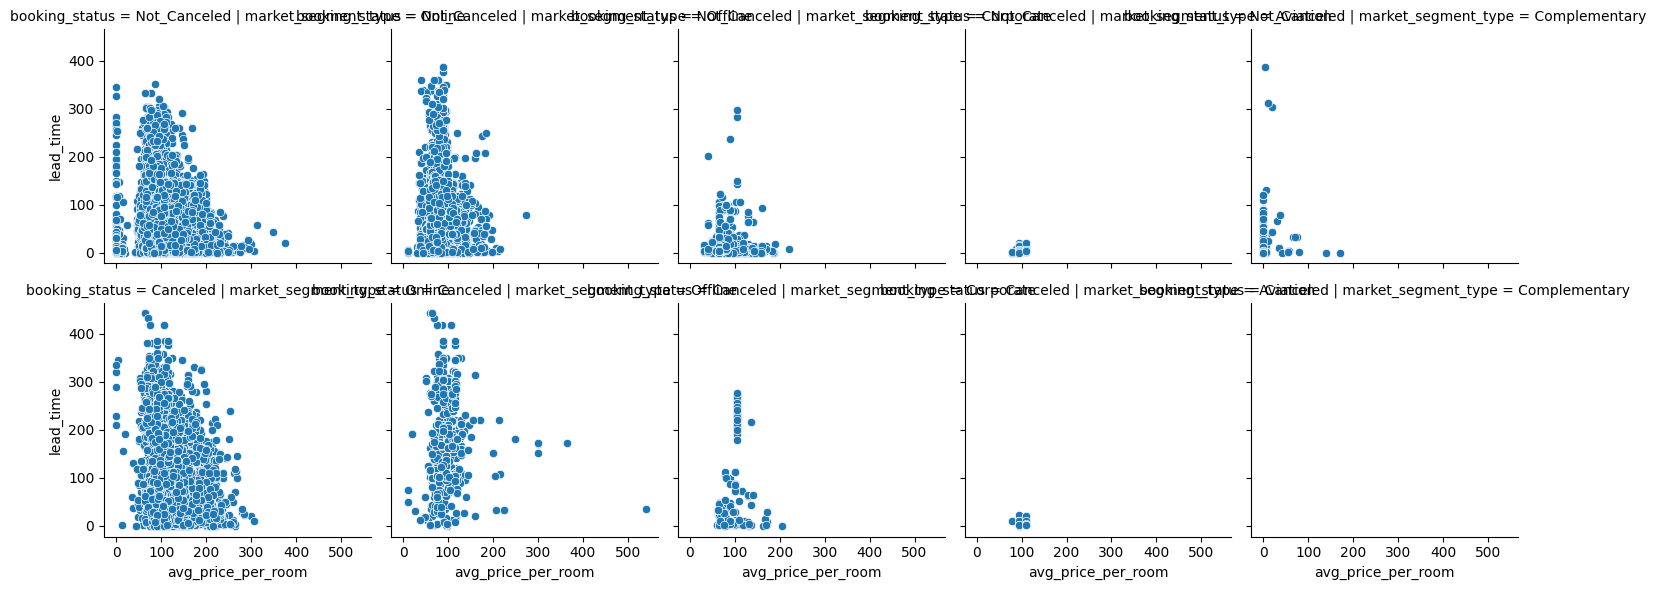

In [54]:
plt.figure(figsize = (50, 30))
g = sns.FacetGrid(df, col = "market_segment_type", row = "booking_status")
g.map(sns.scatterplot, "avg_price_per_room", "lead_time")

In [58]:
fig, axes =plt.subplots(1,2, figsize = (15, 8))
sns.pointplot(data = df, x = "market_segment_type", y = "lead_time", hue = "booking_status", ax = axes[0])
sns.pointplot(data = df, x = "market_segment_type", y = "avg_price_per_room", hue = "booking_status", ax = axes[1])

<AxesSubplot: xlabel='market_segment_type', ylabel='avg_price_per_room'>

In [14]:
import numpy as np

table1 = pd.pivot_table(df[df["booking_status"] == "Not_Canceled"], index = ["market_segment_type"], columns=["room_type_reserved"], values = "avg_price_per_room", 
                        aggfunc = np.mean)
table2 = pd.pivot_table(df[df["booking_status"] == "Not_Canceled"], index = ["market_segment_type"], columns=["room_type_reserved"], values = "lead_time", aggfunc=np.mean)
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.heatmap(table1, annot= True, fmt = ".1f", ax = axes[0])
sns.heatmap(table2, annot = True, fmt = ".1f", ax = axes[1])
plt.suptitle("Mean of lead time and avg price per room based on Market Segment Type and Room Type Reserved that is not canceled");


In [15]:
table1 = pd.pivot_table(df[df["booking_status"] == "Canceled"], index = ["market_segment_type"], columns=["room_type_reserved"], values = "avg_price_per_room", 
                        aggfunc = np.mean)
table2 = pd.pivot_table(df[df["booking_status"] == "Canceled"], index = ["market_segment_type"], columns=["room_type_reserved"], values = "lead_time", aggfunc=np.mean)
fig, axes = plt.subplots(1,2, figsize = (15, 8))
sns.heatmap(table1, annot= True, fmt = ".1f", ax = axes[0])
sns.heatmap(table2, annot = True, fmt = ".1f", ax = axes[1])
plt.suptitle("Mean of lead time and avg price per room based on Market Segment Type and Room Type Reserved that is Canceled");

# Cleaning, Preprocessing and Creating predictive model for the data
- In this content we're going to clean the data first.
- Next step is preporcess it or do some feature engineering.
- Last is generate a model that can predict the labels.

In [8]:
df.groupby(["booking_status"]).mean()

no_of_adults  ...  no_of_special_requests
booking_status                ...                        
Canceled            1.909834  ...                0.334337
Not_Canceled        1.813451  ...                0.758215

[2 rows x 14 columns]

In [9]:
df.groupby(["booking_status"]).sum()

no_of_adults  ...  no_of_special_requests
booking_status                ...                        
Canceled             22431.0  ...                  3887.0
Not_Canceled         43735.0  ...                 18091.0

[2 rows x 14 columns]

In [10]:
df.groupby(["booking_status"]).agg({"no_of_weekend_nights": ["min", "max", "mean"], "no_of_week_nights": ["min", "max", "mean"], "avg_price_per_room": ["max", "mean", "std"],"lead_time": ["min", "max", "mean"]})

no_of_weekend_nights                 ... lead_time                   
                                min  max      mean  ...       min    max        mean
booking_status                                      ...                             
Canceled                        0.0  7.0  0.887653  ...       0.0  443.0  139.361775
Not_Canceled                    0.0  6.0  0.772418  ...       0.0  386.0   58.955986

[2 rows x 12 columns]

In [15]:
count1 = df.booking_status.value_counts().reset_index()
px.pie(count1, values = "booking_status", names = "index", hole = 0.3)

# Cleaning the data

In [175]:
missing_data = (df.isna().sum() / len(df)) * 100
missing_data = missing_data[missing_data > 0 ].reset_index().sort_values(0)
missing_data

index         0
1                         no_of_children  0.893177
2                   no_of_weekend_nights  1.011716
8                           arrival_year  1.042040
0                           no_of_adults  1.138525
15                    avg_price_per_room  1.268091
7                              lead_time  1.301172
13          no_of_previous_cancellations  1.370090
9                          arrival_month  1.389387
4                      type_of_meal_plan  1.450034
14  no_of_previous_bookings_not_canceled  1.516196
12                        repeated_guest  1.615438
16                no_of_special_requests  2.175052
3                      no_of_week_nights  2.224673
10                          arrival_date  2.704342
6                     room_type_reserved  3.228119
11                   market_segment_type  4.168160
5             required_car_parking_space  7.145417

Text(0, 0.5, 'Percentage')

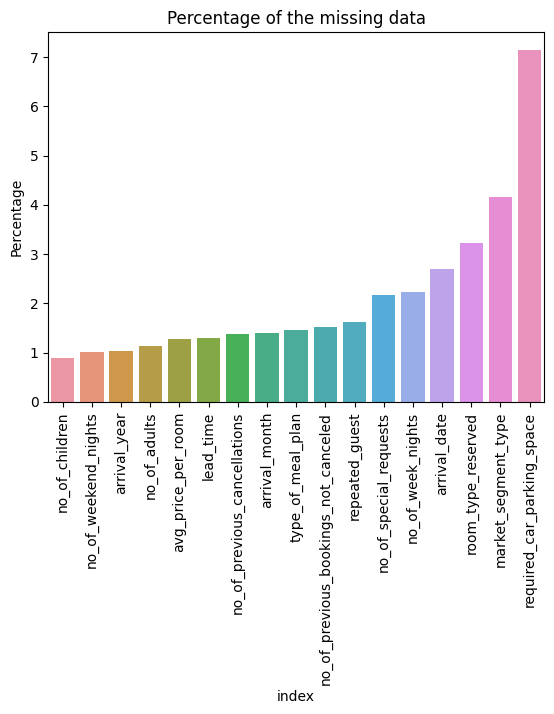

In [136]:
plt.title("Percentage of the missing data")
sns.barplot(missing_data, x = "index", y = 0)
plt.xticks(rotation = 90);
plt.ylabel("Percentage")

In [176]:
import numpy as np
columns = ["no_of_children", "no_of_weekend_nights", "no_of_adults", "no_of_week_nights"]
for col in columns:
    for key, values in df.groupby(["booking_status"]).mean()[col].items():
        df.loc[(df["booking_status"] == key) & (df[col].isna()), col] = np.round(values)


In [177]:
df.groupby(["booking_status"]).median
dict1 = {
    "arrival_year": 2018,
    "arrival_date": 16,
    "arrival_month":8
}
for key, values in dict1.items():
    df[key].fillna(values, inplace = True)

In [178]:
columns = ["avg_price_per_room", "lead_time"]
for col in columns:
    for key, values in df.groupby(["booking_status"]).mean()[col].items():
        if col == "lead_time":
            df.loc[(df["booking_status"] == key) & (df[col].isna()), col] = np.round(values)
        elif col == "avg_price_per_room":
            df.loc[(df["booking_status"] == key) & (df[col].isna()), col] = np.round(values,2)

In [179]:
columns = ["no_of_previous_cancellations", "no_of_previous_bookings_not_canceled"]
for col in columns:
    for key, values in df.groupby(["booking_status"]).mean()[col].items():
        df.loc[(df["booking_status"] == key) & (df[col].isna()), col] = np.round(values)

In [180]:
columns = ["type_of_meal_plan", "market_segment_type", "room_type_reserved"]
for col in columns:
    df[col].fillna("Unknown", inplace = True)

In [181]:
df.repeated_guest.fillna(0, inplace = True)

In [182]:
for key, values in df.groupby(["booking_status"]).median()["no_of_special_requests"].items():
    df.loc[df["booking_status"] == key, "no_of_special_requests"] = np.round(values) 

In [183]:
for key, values in df.groupby(["booking_status"]).median()["required_car_parking_space"].items():
    df.loc[df["booking_status"] == key, "required_car_parking_space"] = np.round(values) 

In [184]:
missing_data = (df.isna().sum() / len(df)) * 100
missing_data = missing_data[missing_data > 0 ].reset_index().sort_values(0)
missing_data

Empty DataFrame
Columns: [index, 0]
Index: []

# Feature Engineering

In [185]:
df["total_num_people"] = df["no_of_children"] + df["no_of_adults"]
df["total_num_days"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]

In [186]:
df.drop(columns=["no_of_children", "no_of_adults", "no_of_weekend_nights", "no_of_week_nights"], inplace = True)

In [187]:
df

Booking_ID type_of_meal_plan  ...  total_num_people total_num_days
0       INN00001           Unknown  ...               2.0            3.0
1       INN00002      Not Selected  ...               2.0            5.0
2       INN00003       Meal Plan 1  ...               1.0            3.0
3       INN00004       Meal Plan 1  ...               2.0            2.0
4       INN00005      Not Selected  ...               2.0            2.0
...          ...               ...  ...               ...            ...
36270   INN36271       Meal Plan 1  ...               3.0            4.0
36271   INN36272       Meal Plan 1  ...               2.0            4.0
36272   INN36273       Meal Plan 1  ...               2.0            8.0
36273   INN36274      Not Selected  ...               2.0            3.0
36274   INN36275       Meal Plan 1  ...               2.0            3.0

[36275 rows x 17 columns]

# Preprocessing the data

In [268]:
df_tmp = df.copy()

In [269]:
df_tmp.loc[df_tmp["booking_status"] == "Not_Canceled", "booking_status"] = 0
df_tmp.loc[df_tmp["booking_status"] == "Canceled", "booking_status"] = 1
df_tmp["booking_status"] = df_tmp["booking_status"].astype(int)
df_tmp.drop("Booking_ID",axis = 1, inplace=True)

In [278]:
X = df_tmp.drop("booking_status", axis = 1)
y = df_tmp["booking_status"]

In [280]:
for col in X.columns:
    if pd.api.types.is_object_dtype(df_tmp[col]):
        df_tmp[col] = df_tmp[col].astype("category")
for col in X.columns:
    if pd.api.types.is_categorical_dtype(df_tmp[col]):
        df_tmp[col] = df_tmp[col].cat.codes

In [281]:
df_tmp

type_of_meal_plan  ...  total_num_days
0                      4  ...             3.0
1                      3  ...             5.0
2                      0  ...             3.0
3                      0  ...             2.0
4                      3  ...             2.0
...                  ...  ...             ...
36270                  0  ...             4.0
36271                  0  ...             4.0
36272                  0  ...             8.0
36273                  3  ...             3.0
36274                  0  ...             3.0

[36275 rows x 16 columns]

In [248]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Splitting the data into train test split

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

# Predictive Model
- RandomForestClassifier
- LogisticRegression
- Deep Model

<AxesSubplot: >

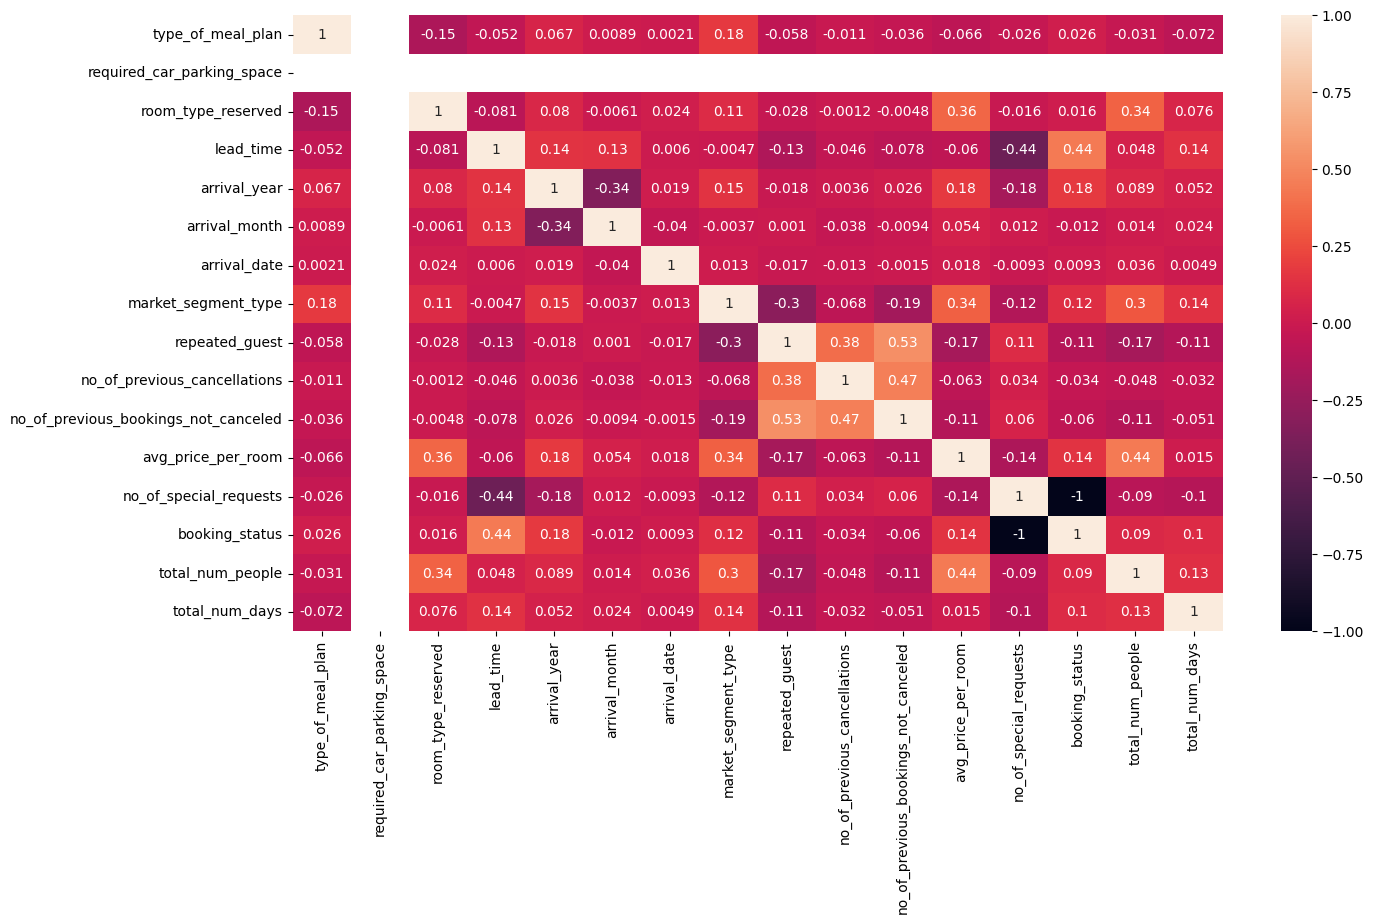

In [219]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_tmp.corr(), annot = True)

### Random Forest Classifier Model

In [284]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
cross_mean = cross_val_score(model, X, y, cv = 5)
cross_mean, cross_mean.mean()

(array([1., 1., 1., 1., 1.]), 1.0)

In [285]:
print("Accuracy Score: ", model.score(X_train, y_train))

Accuracy Score:  1.0


In [286]:
from sklearn.metrics import classification_report
y_preds = model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7289
           1       1.00      1.00      1.00      3594

    accuracy                           1.00     10883
   macro avg       1.00      1.00      1.00     10883
weighted avg       1.00      1.00      1.00     10883



In [287]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [288]:
y_probs = model.predict_proba(X_test)
y_pos = y_probs[:,1]

fpr, tpr, thresh = roc_curve(y_test, y_pos)
plt.title("ROC Curve")
plt.plot(fpr, tpr, label = np.round(roc_auc_score(y_test, y_preds), 2))
plt.legend()

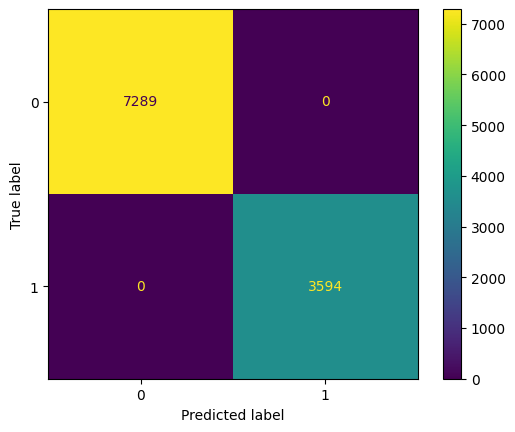

In [289]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [290]:
imp = model.feature_importances_
sns.barplot(x = X.columns, y = imp)
plt.xticks(rotation = 90);

### LogisticRegression

In [294]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(solver = "lbfgs", max_iter = 100)
model2.fit(X_train, y_train)

cross_mean2 = cross_val_score(model2, X, y, cv = 5)
cross_mean2, cross_mean2.mean()

(array([0.96374914, 0.99889731, 0.96733287, 0.95382495, 0.99889731]),
 0.9765403170227429)

In [295]:
from sklearn.metrics import classification_report
y_preds = model2.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7289
           1       1.00      1.00      1.00      3594

    accuracy                           1.00     10883
   macro avg       1.00      1.00      1.00     10883
weighted avg       1.00      1.00      1.00     10883



In [297]:
y_probs = model2.predict_proba(X_test)
y_pos = y_probs[:,1]

fpr, tpr, thresh = roc_curve(y_test, y_pos)
plt.title("ROC Curve")
plt.plot(fpr, tpr, label = np.round(roc_auc_score(y_test, y_preds), 2))
plt.legend()

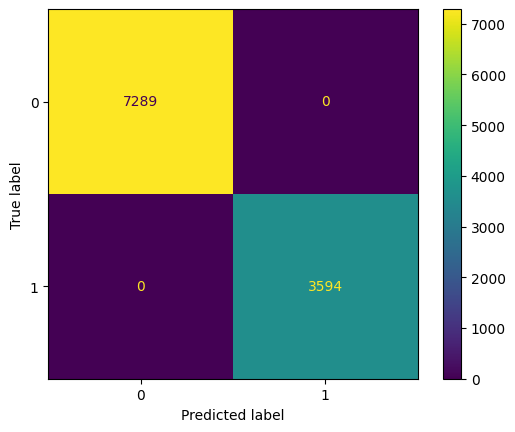

In [298]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [306]:
imp = model2.coef_
sns.barplot(x = X.columns, y = imp[0])
plt.xticks(rotation = 90);

### Creating Deep Learning Model Architecture Using Pytorch

In [307]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [311]:
X = torch.tensor(df_tmp.drop("booking_status", axis = 1).values).float()
y = torch.tensor(df_tmp["booking_status"].values).float()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, shuffle = True, batch_size = 32)

test_data = TensorDataset(X_test, y_test)
train_loader = DataLoader(test_data, shuffle = True, batch_size = 32)

In [319]:
class ANNmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.ModuleDict()
        self.layers["input"] = nn.Linear(X.shape[1], 32)
        self.layers["hidden1"] = nn.Linear(32, 64)
        self.layers["hidden2"] = nn.Linear(64,32)
        self.layers["output"] = nn.Linear(32, 1)
    def forward(self, x):
        x = self.layers["input"](x)
        x = F.relu(elf.layers["hidden1"](x))
        x = F.relu(self.layers["hidden2"](x))
        x = self.layers["output"](x)
        return x

In [315]:
model = ANNmodel()
optimizers = torch.optim.Adam(model.parameters(), lr = 0.01)
lossfun = nn.BCEWithLogitsLoss()

In [325]:
from sklearn.metrics import accuracy_score
num_epochs = 100
losses_train = torch.zeros(num_epochs)
all_acc_train = []

losses_test = torch.zeros(num_epochs)
all_acc_test = []
for epoch in range(num_epochs):
    model.train()
    for X, y in train_loader:
        yHat = model(X)
        loss = lossfun(yHat.reshape(-1), y)
        losses_train[epoch] = loss
        
        optimizers.zero_grad()
        loss.backward()
        optimizers.step()
        
        yHat = [1 if i > 0 else 0 for i in yHat.reshape(-1)]
        all_acc_train.append(accuracy_score(y, yHat))
    model.eval()
    with torch.no_grad():
        for X_test, y_test in train_loader:
            y_preds = model(X_test).detach().reshape(-1)
            loss = lossfun(y_preds, y_test)
            losses_test[epoch] = loss
        
            y_preds = [1 if i > 0 else 0 for i in y_preds]
            all_acc_test.append(accuracy_score(y_test, y_preds))


Text(0, 0.5, 'Accuracy')

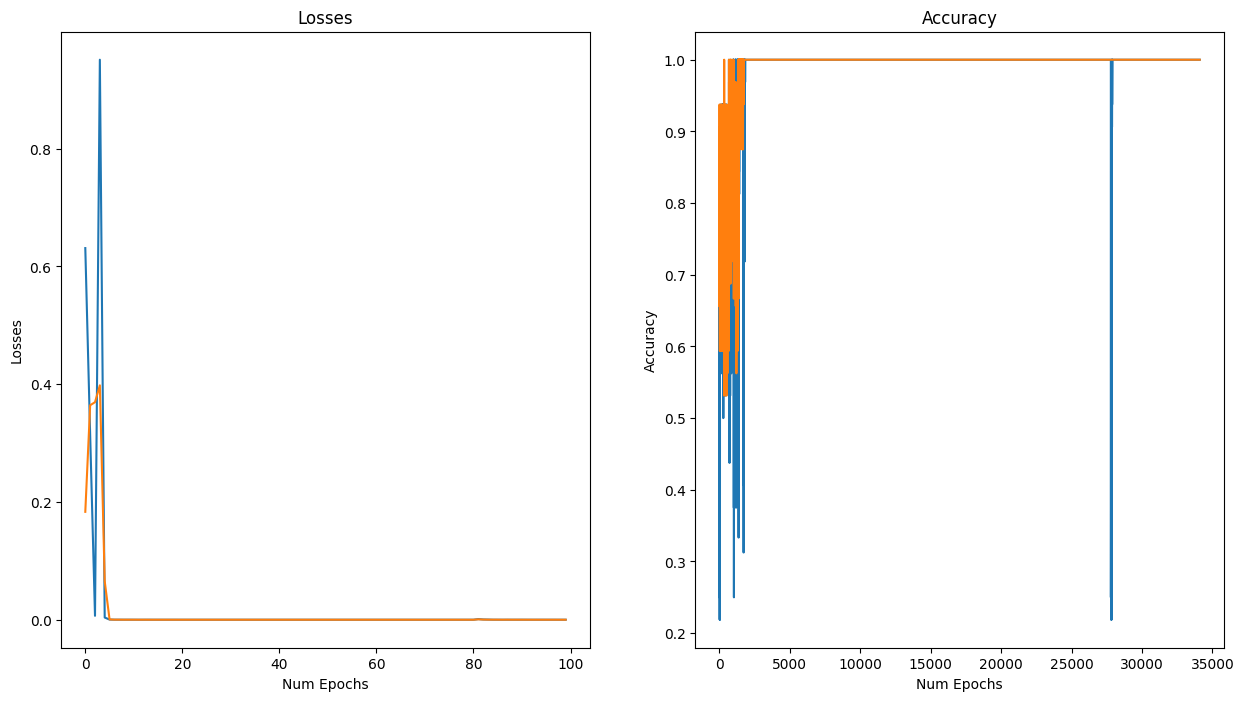

In [333]:
fig, ax = plt.subplots(1,2, figsize = (15, 8))
ax[0].set_title("Losses")
ax[0].plot(losses_train.detach(), label = "losses")
ax[0].plot(losses_test.detach(), label = "val_losses")
ax[0].set_xlabel("Num Epochs")
ax[0].set_ylabel("Losses")


ax[1].set_title("Accuracy")
ax[1].plot(all_acc_train, label = "accuracy")
ax[1].plot(all_acc_test, label = "val_accuracy")
ax[1].set_xlabel("Num Epochs")
ax[1].set_ylabel("Accuracy")